In [19]:
#   Assignment 05 - Data Analytics II

#   1. Implement logistic regression using Python to perform classification on Social_Network_ads.csv dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [20]:
#   data preprocessing
df = dataset.drop(['User ID'], axis=1)
df.describe()


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


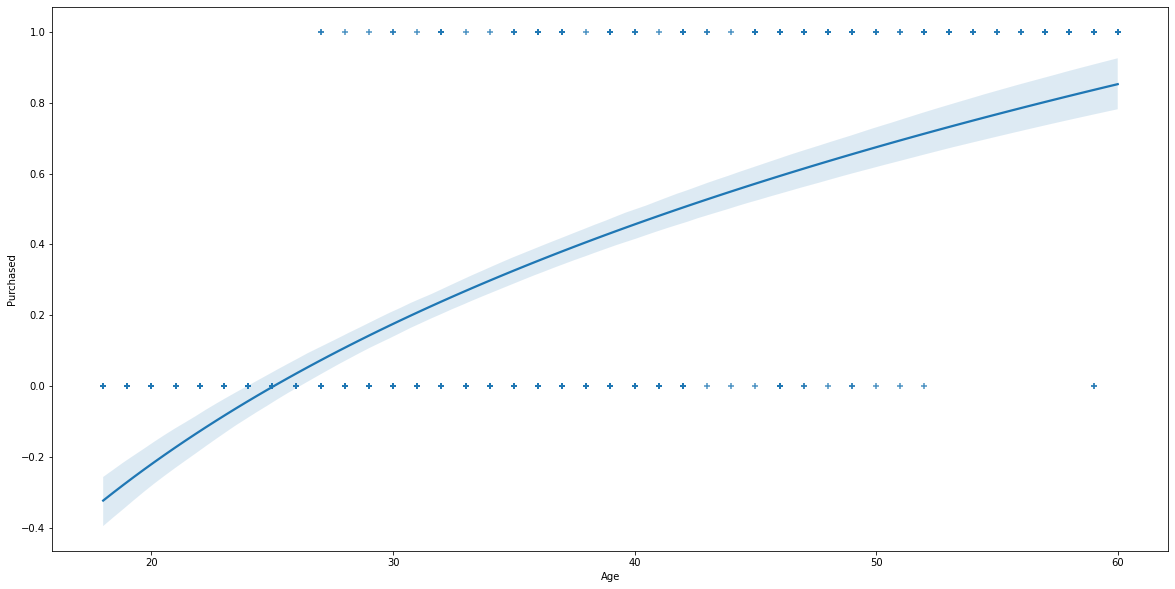

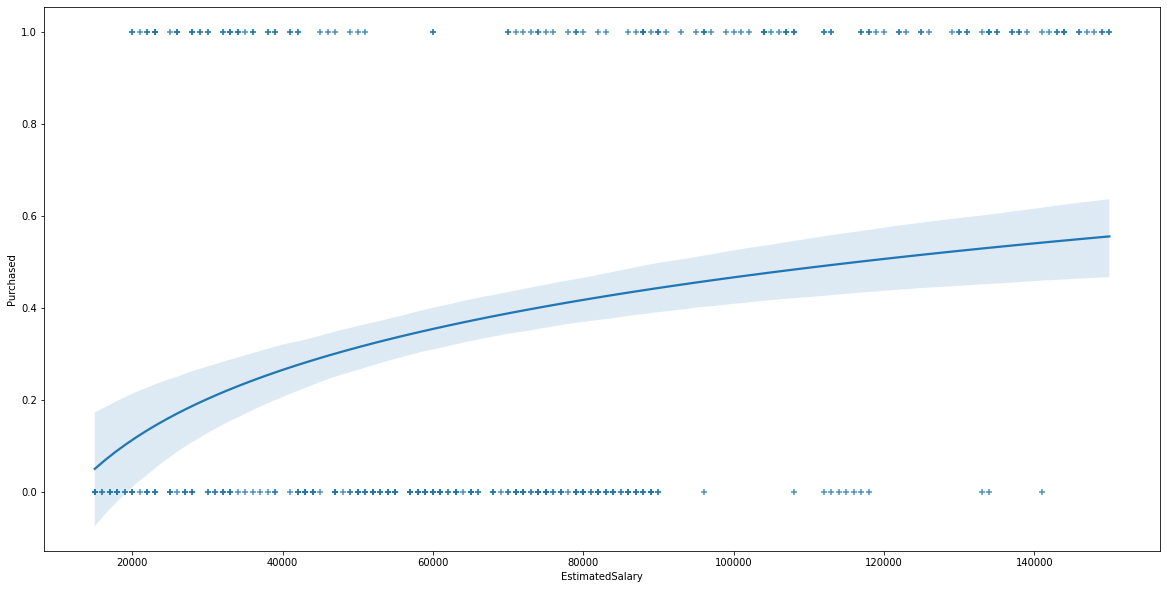

In [21]:
#   Scatter Plot
target = df['Purchased']
features=['Age', 'EstimatedSalary']

for i, cols in enumerate(features):
    plt.figure(figsize=(20,10))
    sns.regplot(data=df, x=df[cols], y=target, marker='+', logx=True)
    
#   the below plot shows that there is increase in demand for life insuarance above age of x1 = ~35 and x2 = ~65000 salary where probability of Insuarance purchased is y=0.4 i.e. 40%


In [22]:
df.head(0)

,Gender,Age,EstimatedSalary,Purchased


In [23]:
#   Data Preparation

#   features = independent variables in data
features = ['Age', 'EstimatedSalary']

#   target is the dependent variable for which we have to make predictions
target = df['Purchased']

#   create a dataset X and Y with two columns -> 'Age, EstimatedSalary' and 'Purchased' respectively
X = pd.DataFrame(np.c_[df['Age'],df['EstimatedSalary']], columns = features)
Y = target

#   Split Training and Testing data using train_test_split function provided by sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

#   Here we normalize the X_train and X_test data to integers close to 0 and 1, using Z-Score Transformation (Normalization Technique)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#   fit

model.fit(x_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

#   training set evaluation
y_train_prediction = model.predict(x_train)
rmse_train = (np.sqrt(mse(y_train, y_train_prediction)))
r2_train = r2_score(y_train, y_train_prediction)

#   testing set prediction
y_test_prediction = model.predict(x_test)
rmse_test = (np.sqrt(mse(y_test, y_test_prediction)))
r2_test = r2_score(y_test, y_test_prediction)

In [26]:
print("The Model performance for training set")
print("--------------------------------------")

print('RMSE of training set: ', rmse_train)
print('R2 score of training set: ', r2_train, "\n\n")

print("The Model performance for testing set")
print("--------------------------------------")

print('RMSE of testing set: ', rmse_test)
print('R2 score of testing set: ', r2_test)

The Model performance for training set
--------------------------------------
RMSE of training set:  0.39528470752104744
R2 score of training set:  0.32386747802569293 


The Model performance for testing set
--------------------------------------
RMSE of testing set:  0.3872983346207417
R2 score of testing set:  0.329140461215933


In [27]:
#   2. Compute Confusion Matrix to find TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall on the given dataset.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#   confusion matrix function requires two parameters -> y_true and y_pred
#   y_true is your testing dataset for prediction
#   y_pred is your predicted testing dataset
cm = confusion_matrix(y_true=y_test, y_pred=y_test_prediction)
print(cm, "\n")

#   confusion matrix gives output in the form of 2*2 Matrix which has similar values as shown below
print("tn fn")
print("fp tp")

[[47  6]
 [ 6 21]] 

tn fn
fp tp


In [28]:
tn ,fn, fp, tp = confusion_matrix(y_true=y_test, y_pred=y_test_prediction).ravel()
#   ravel() funcitons makes the array 1D - on single line

In [29]:
#Compute Confusion Matrix to find TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall on the given dataset.

# Accuracy (all correct / all) =>                       TP + TN / TP + TN + FP + FN
# Precision (true positives / predicted positives) =>   TP / TP + FP
# Recall (true positives / all actual positives) =>     TP / TP + FN
# Error Rate =>                                         FP + FN / TP + TN + FP + FN
dataset_total = tp+tn+fp+fn
Accuracy = (tp+tn)/dataset_total
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
ErrorRate = (fp+fn)/dataset_total


print(
    "Accuracy = {0} \n"
    "Precision = {1:2f} \n"
    "Recall = {2:2f} \n"
    "Error Rate = {3}".format(Accuracy,Precision,Recall,ErrorRate)
)

Accuracy = 0.85 
Precision = 0.777778 
Recall = 0.777778 
Error Rate = 0.15


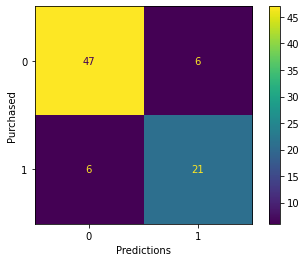

In [31]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.xlabel('Predictions')
plt.ylabel('Purchased')
plt.show()

#   This graph shows that we predicted 21 values to be true and they turned out to be true (True Positive)
#   47 Values were predicted that they wont be purchasing the insaurance -> they didn't purchased any. (True Negative)
#   6,6 values were predicted False Positive, False Negative respectively.
#   False Positive tells us that we predicted 'not purchased' for those values that already purchased the insaurance, viceversa.